<a href="https://colab.research.google.com/github/DNedilko/DAlabs/blob/main/Nedilko_KM_91_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Встановлюємо потрібні бібліотеки, якищо  таких немає

install.packages('Hmisc')
install.packages('tidyverse')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
#@title Імпортуємо усі біліотеки

library(ggplot2)
library(Hmisc)
library(Hmisc)

Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:base’:

    format.pval, units




# Лабораторна робота 1 з Аналізу Даних
Виконала Неділько Дарина КМ-91
## Алгоритми однофакторного і двох  факторного дисперсійного аналізу.  
Мета роботи – здобути практичні навички проведення і аналізу даних  однофакторного та двохфакторного дисперсійного аналізу. 
## Завдання. 
1. Провести дисперсійний аналіз даних, відповідно до  варіанту. Визначити при якій довірчій ймовірності виконуються необхідні  умови. 
2. Провести двох факторний дисперсійний аналіз даних, відповідно до  варіанту. Визначити при якій довірчій ймовірності виконуються необхідні  умови. 

За результатами оформити звіт. В звіті відобразити особливості  реалізації алгоритмів. 
## Виконання


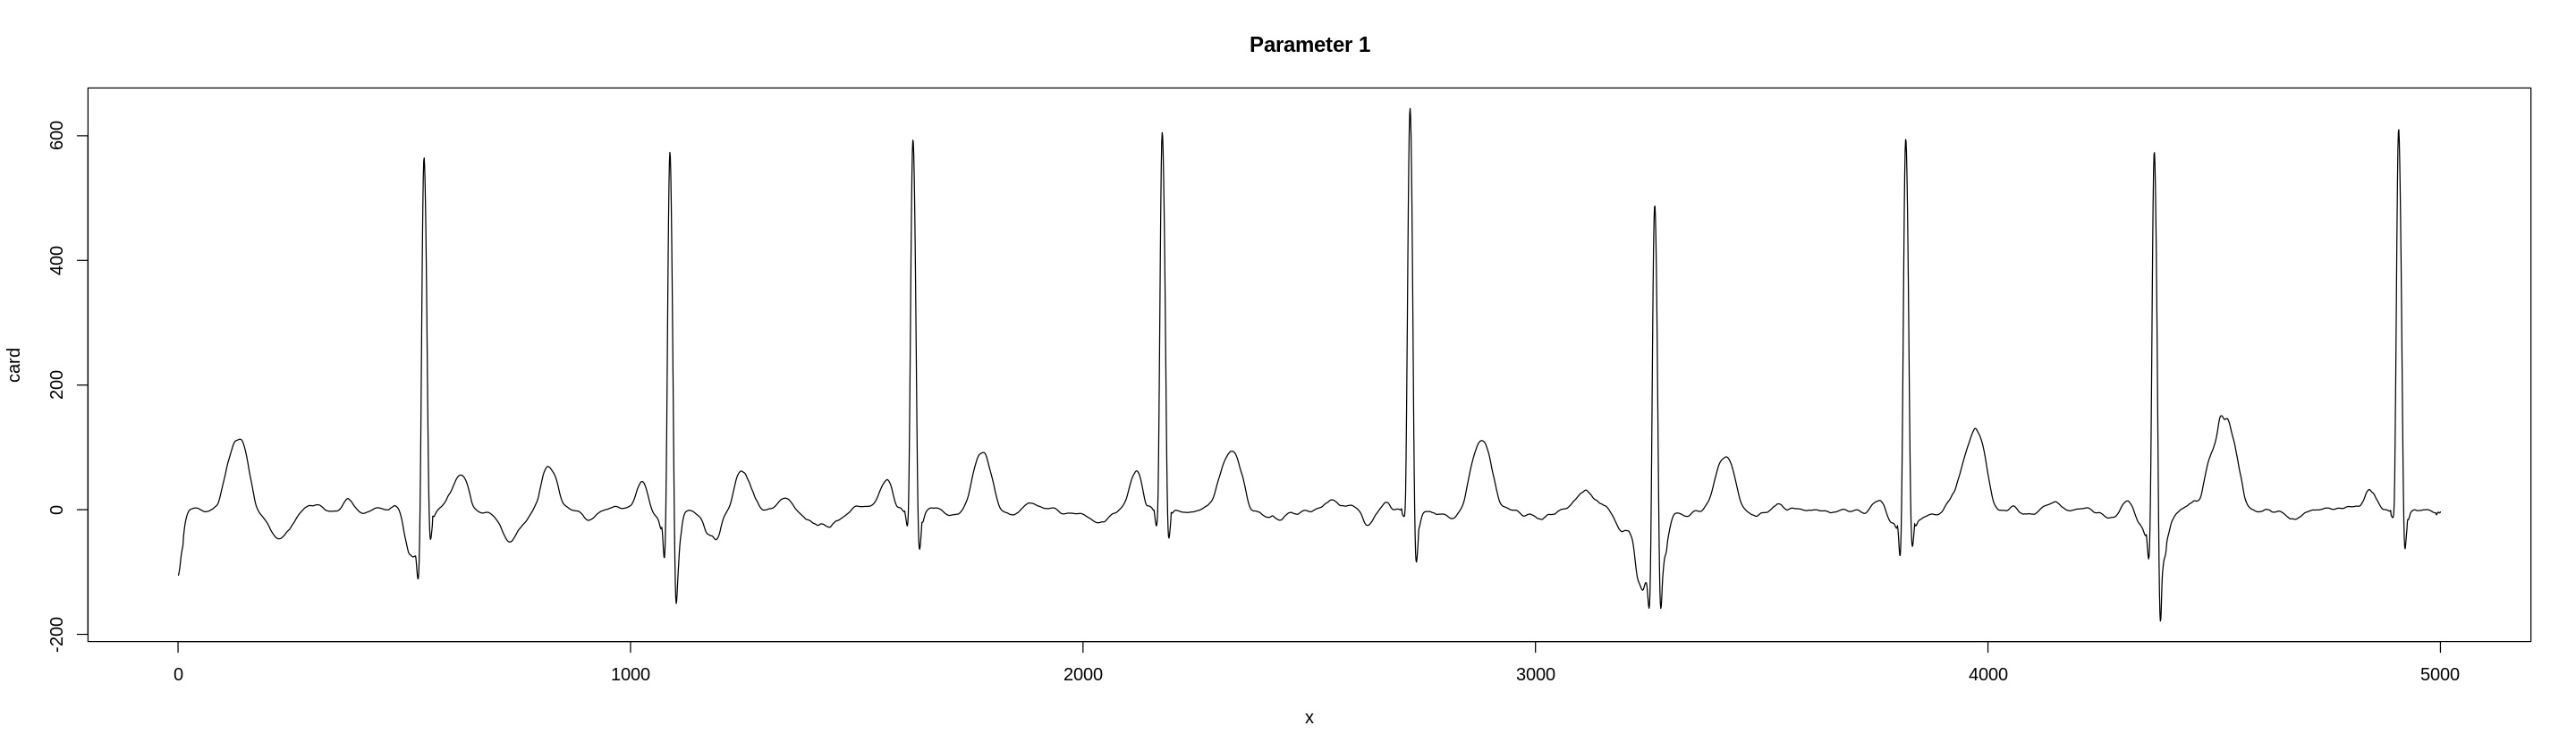

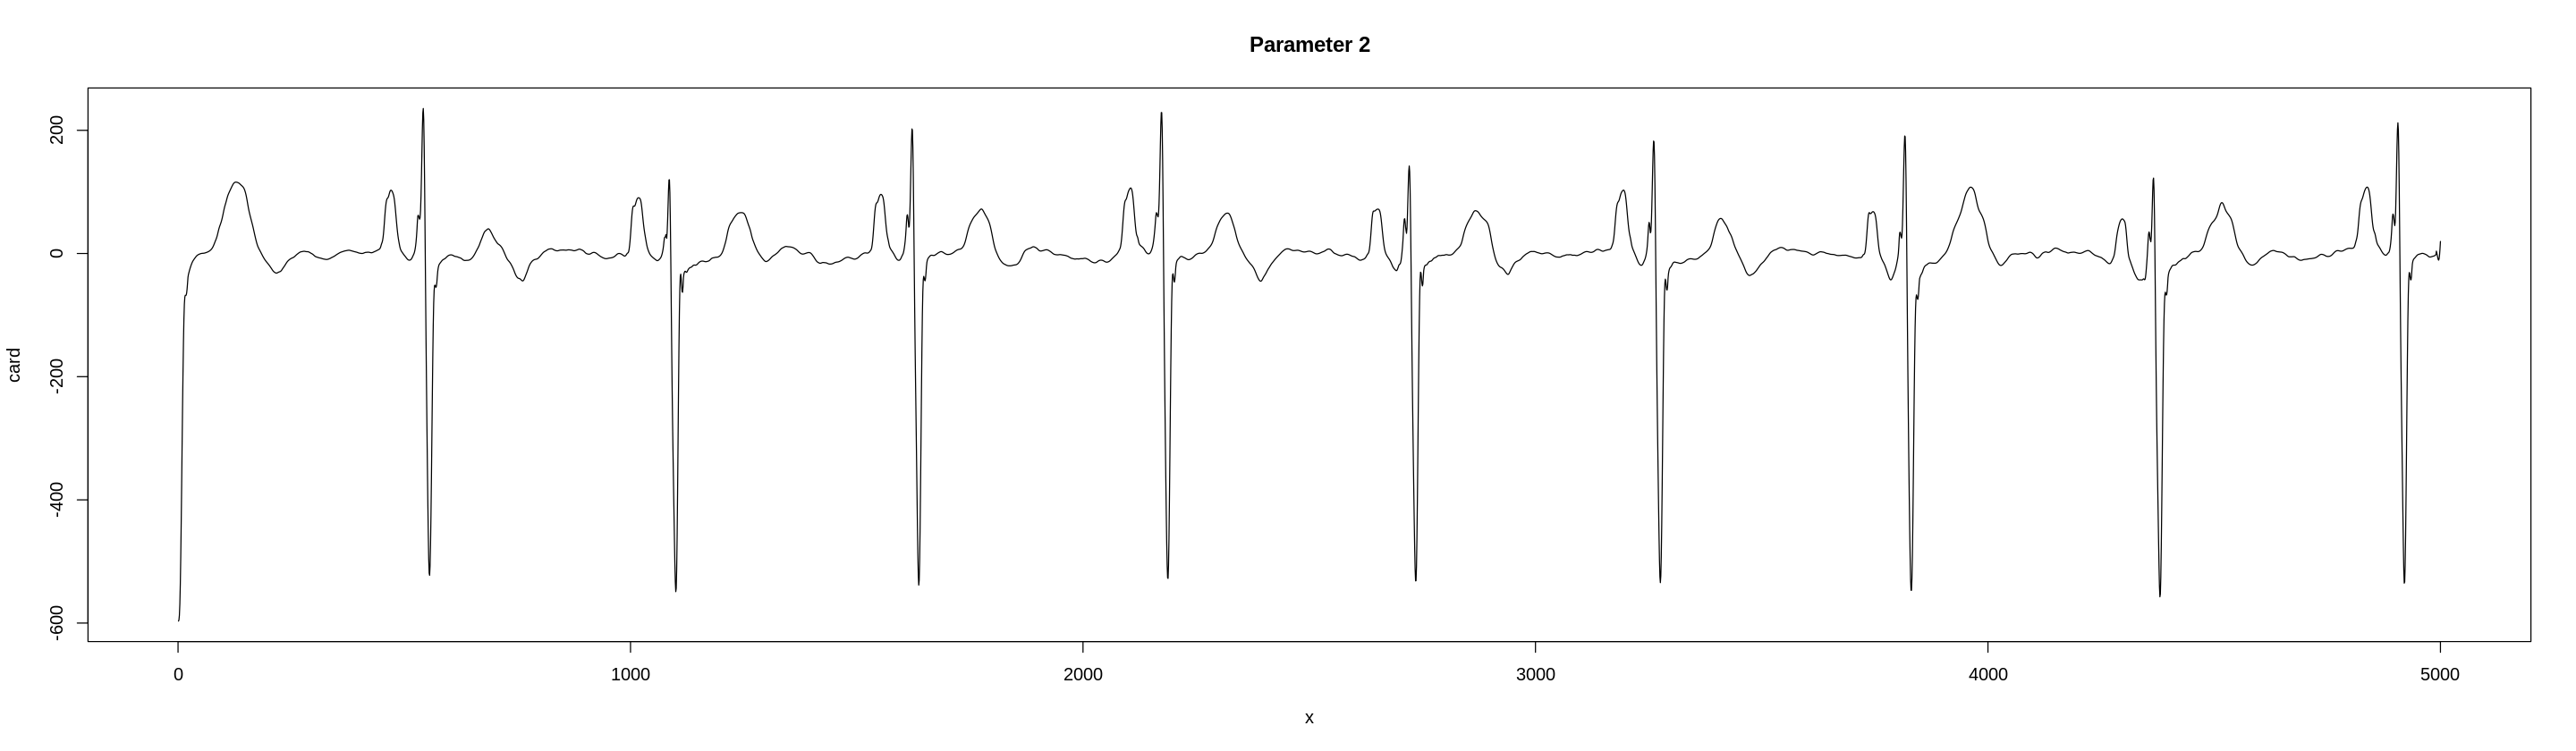

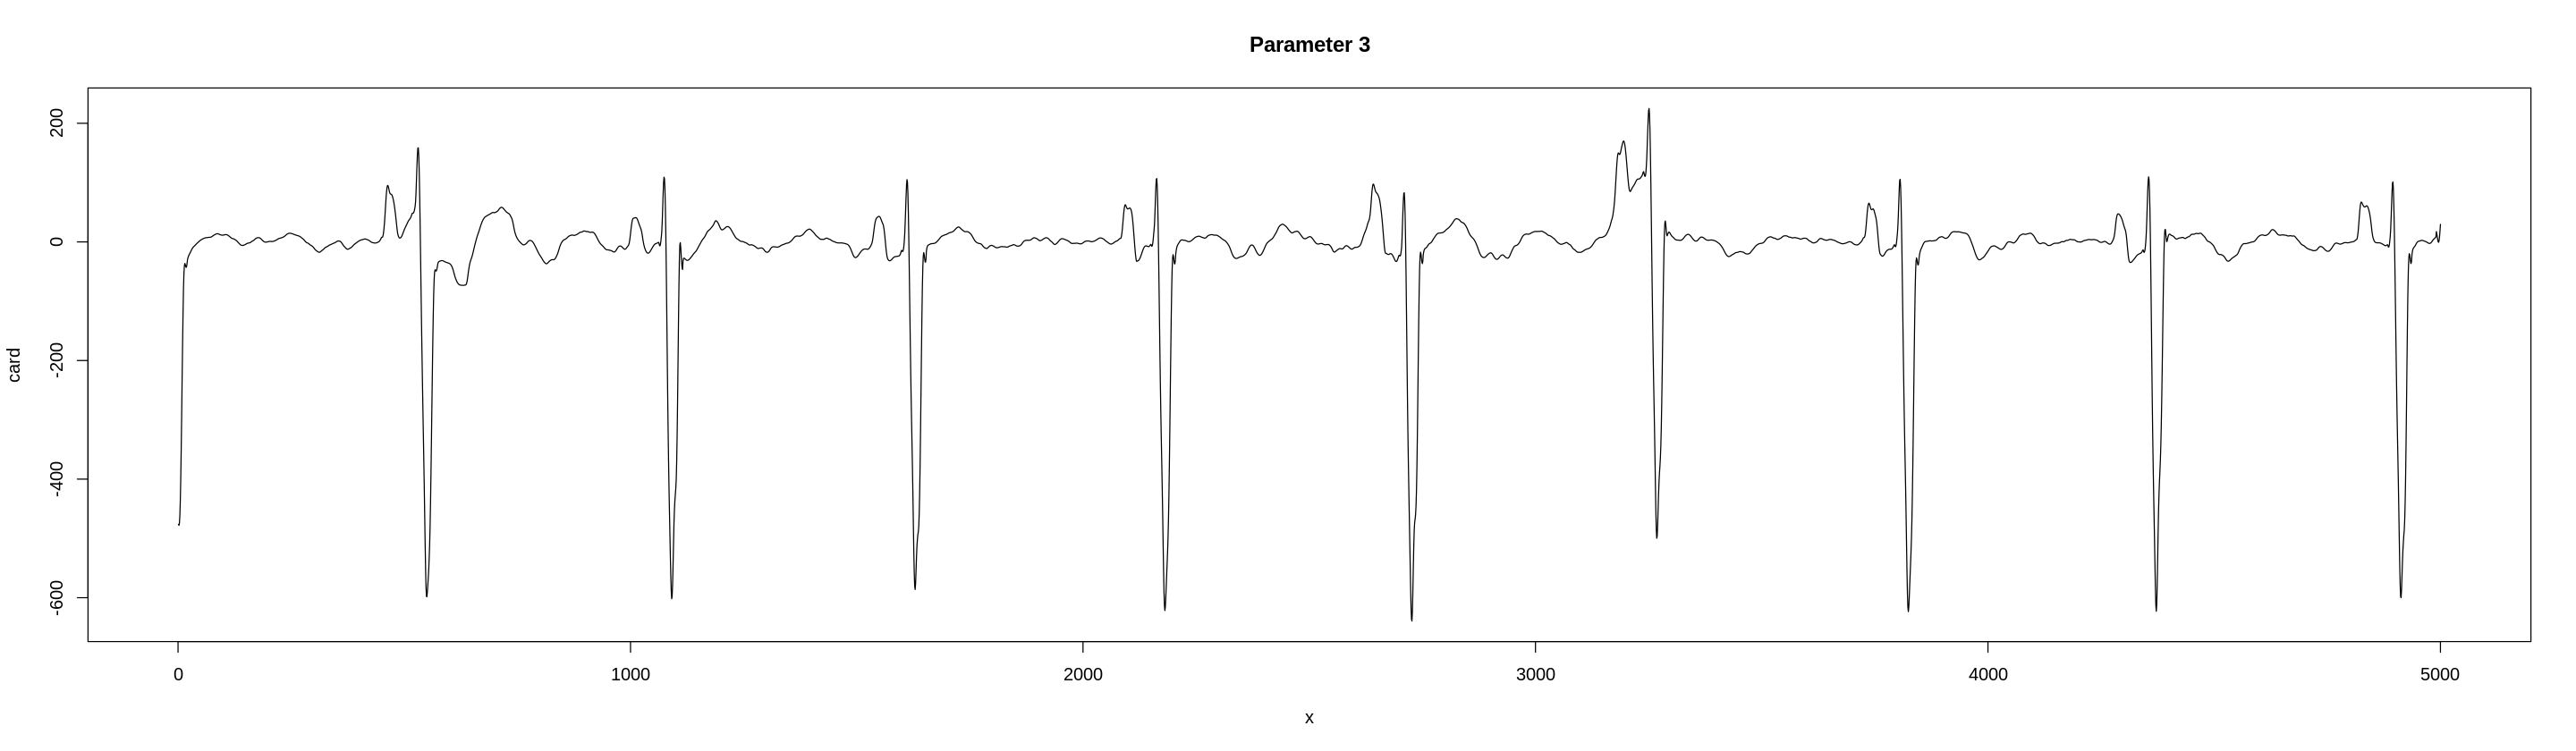

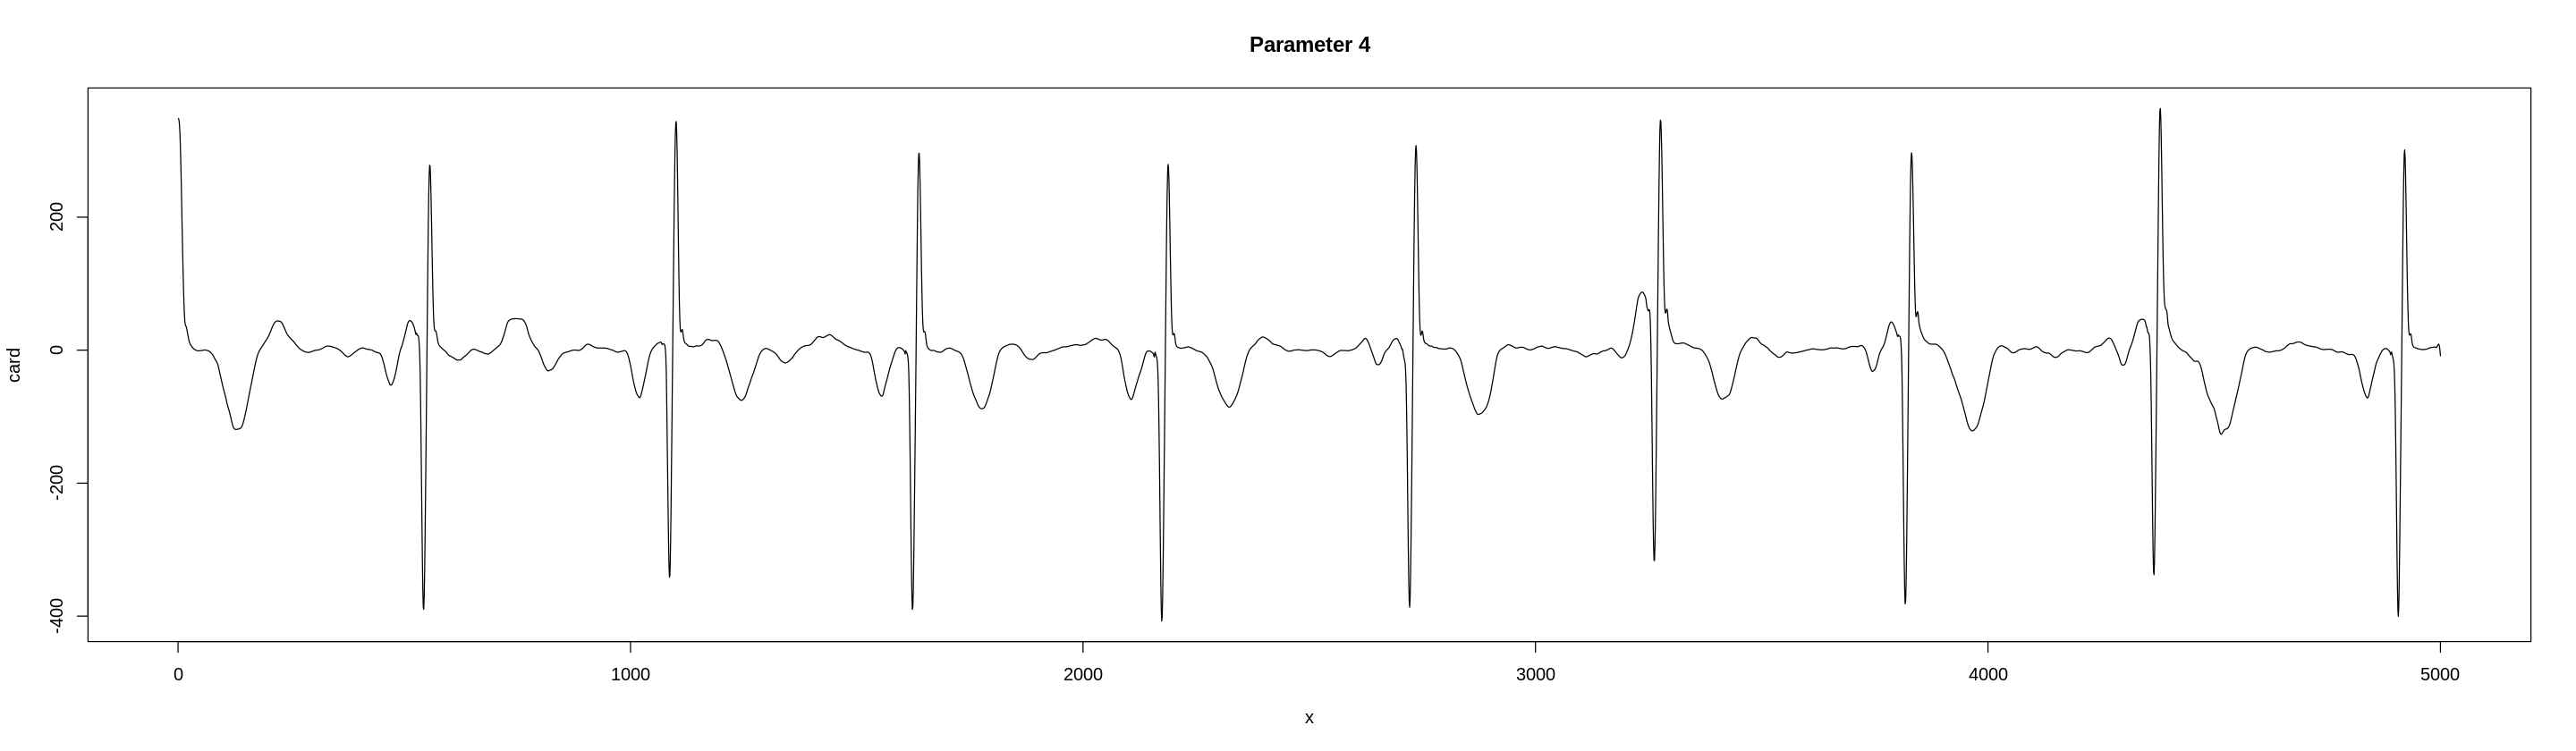

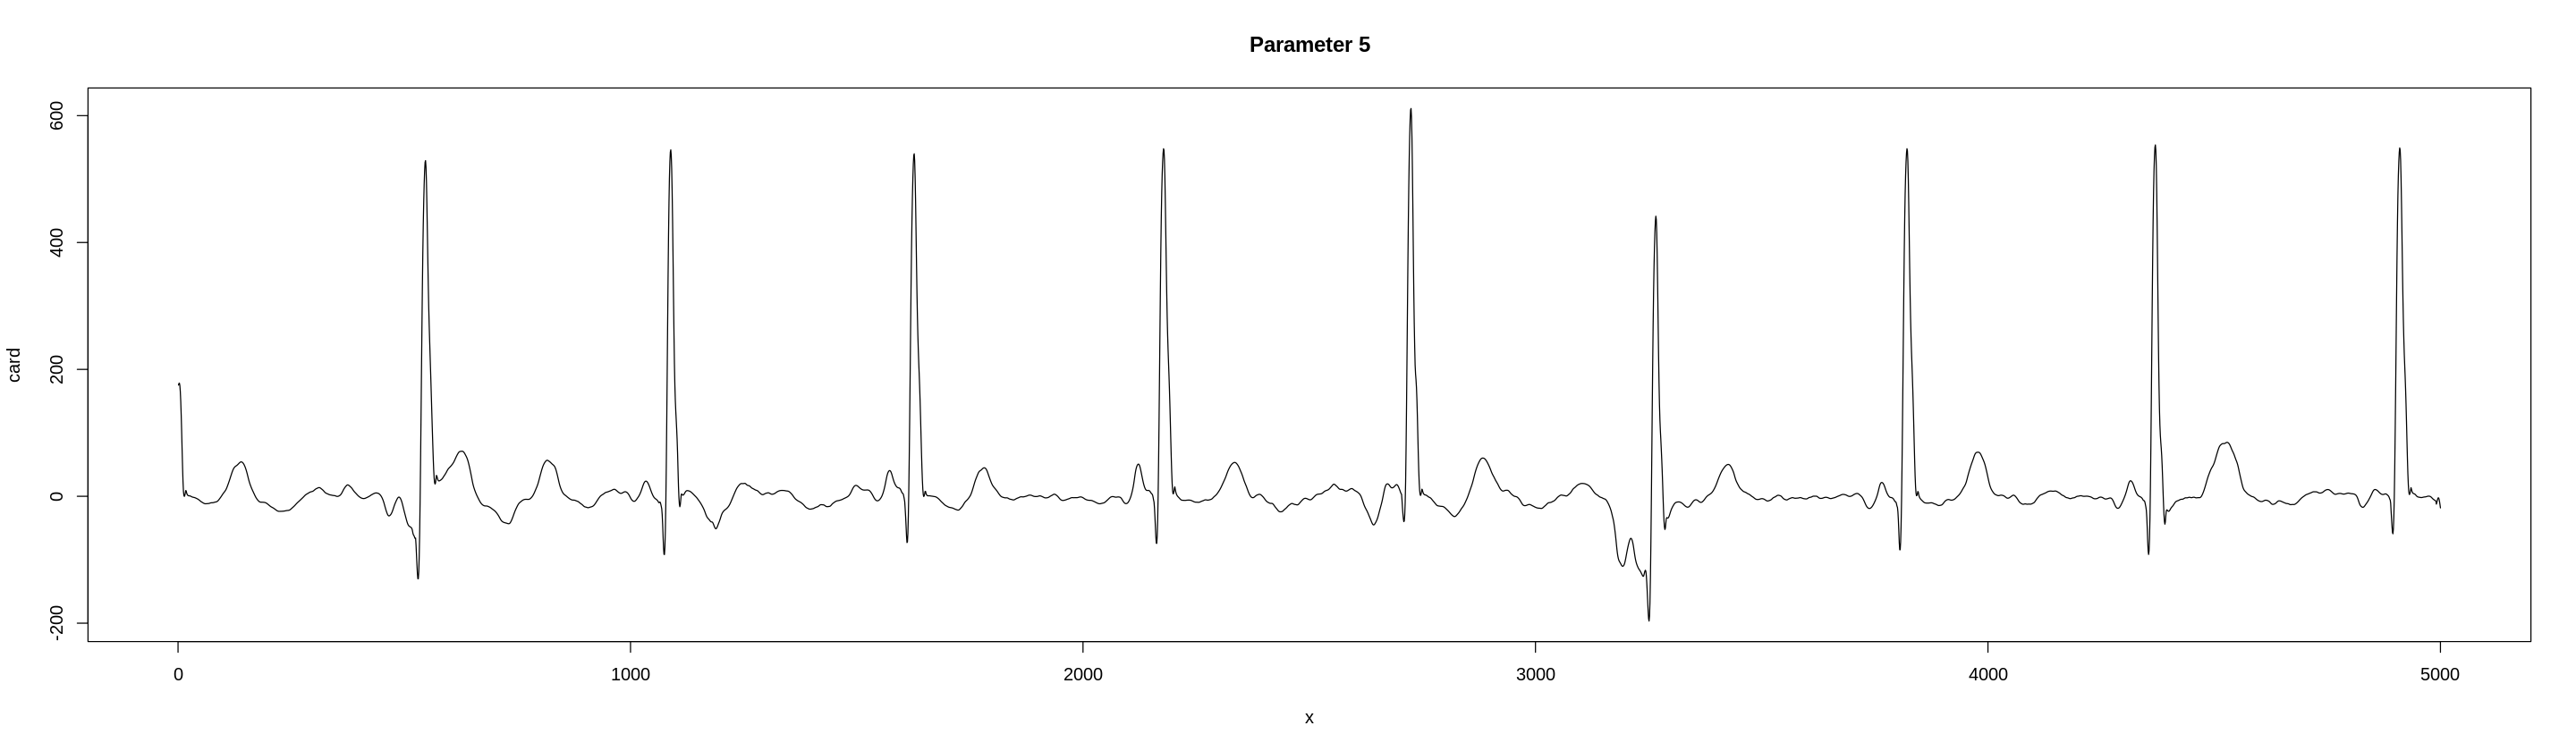

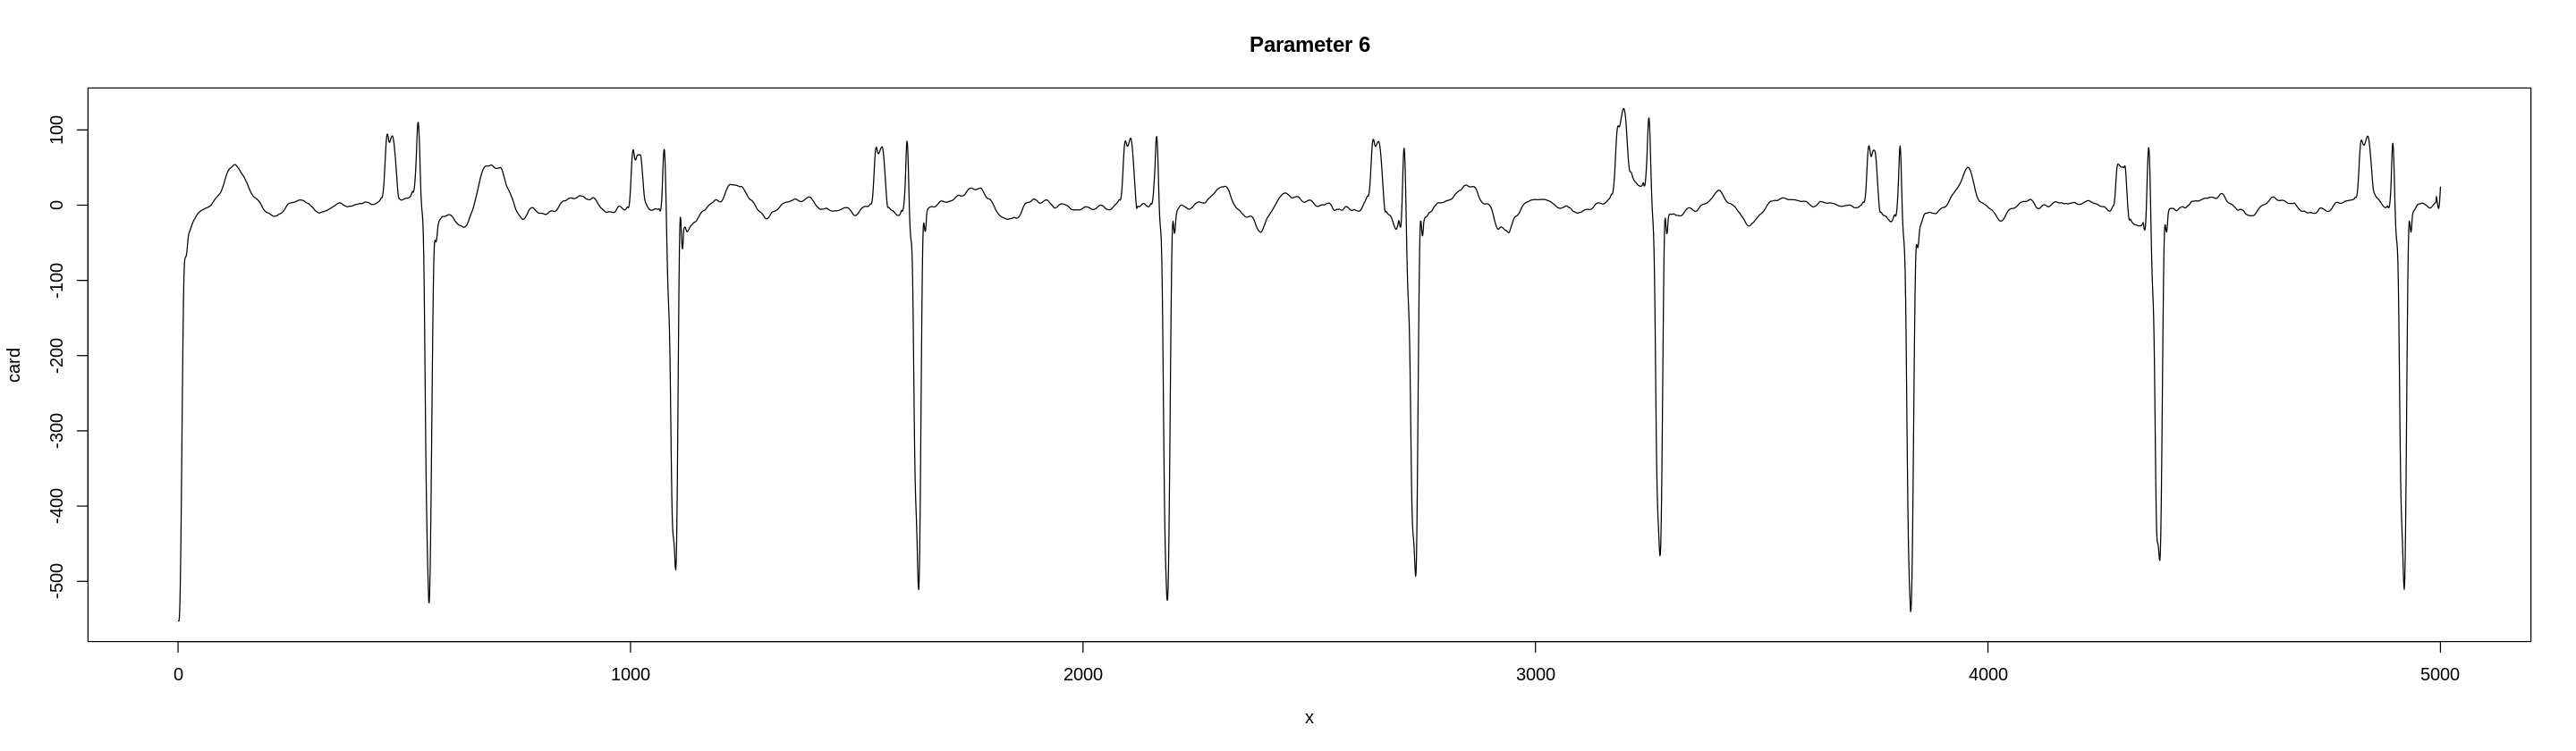

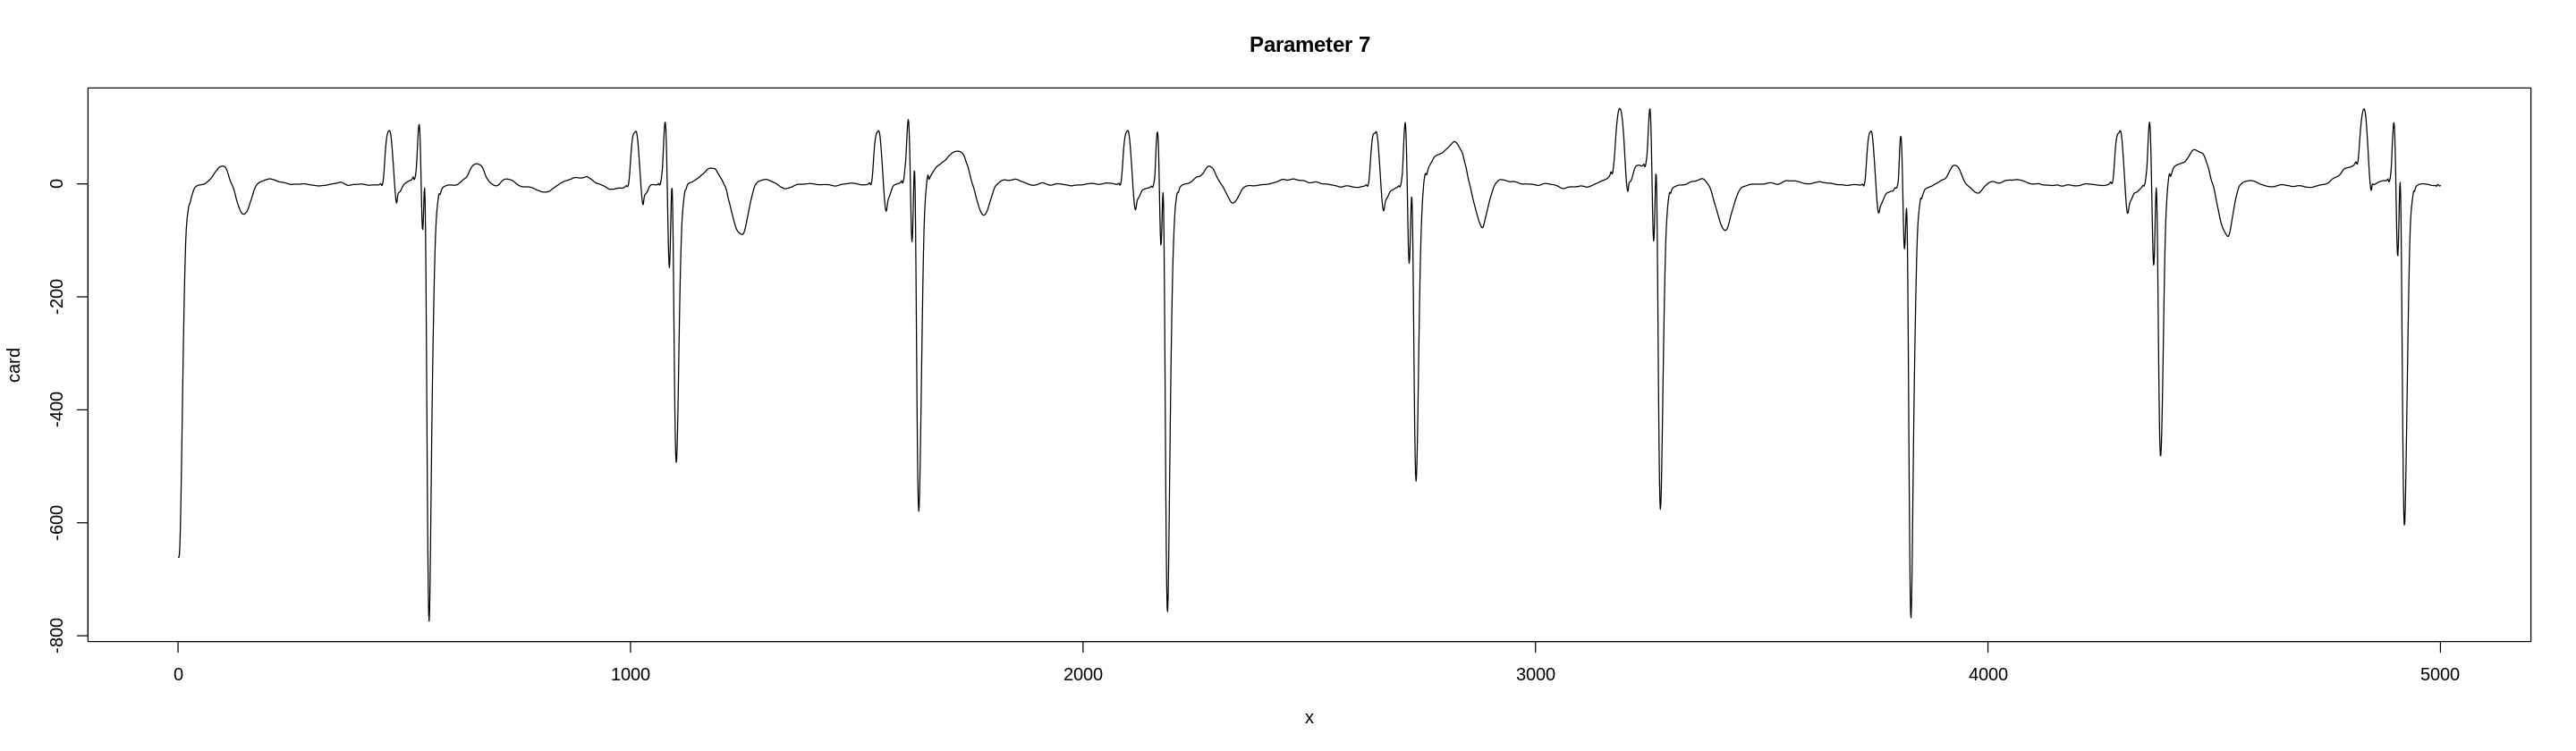

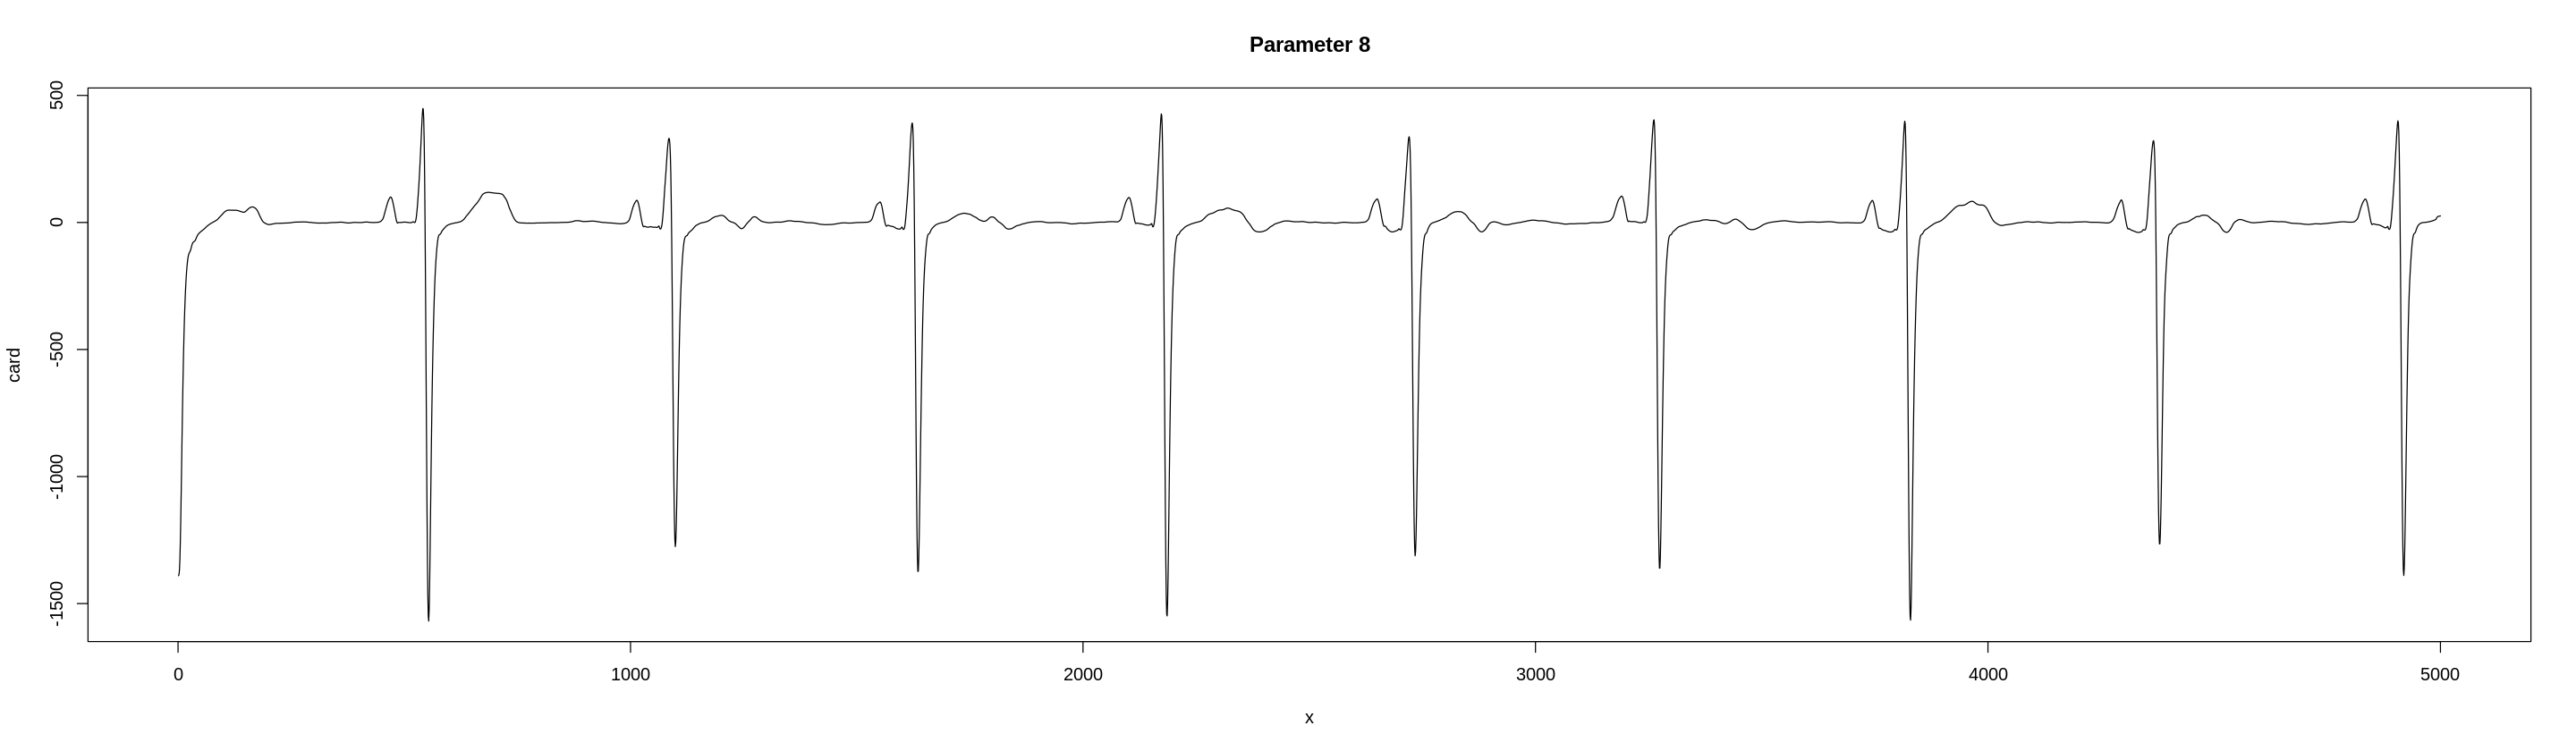

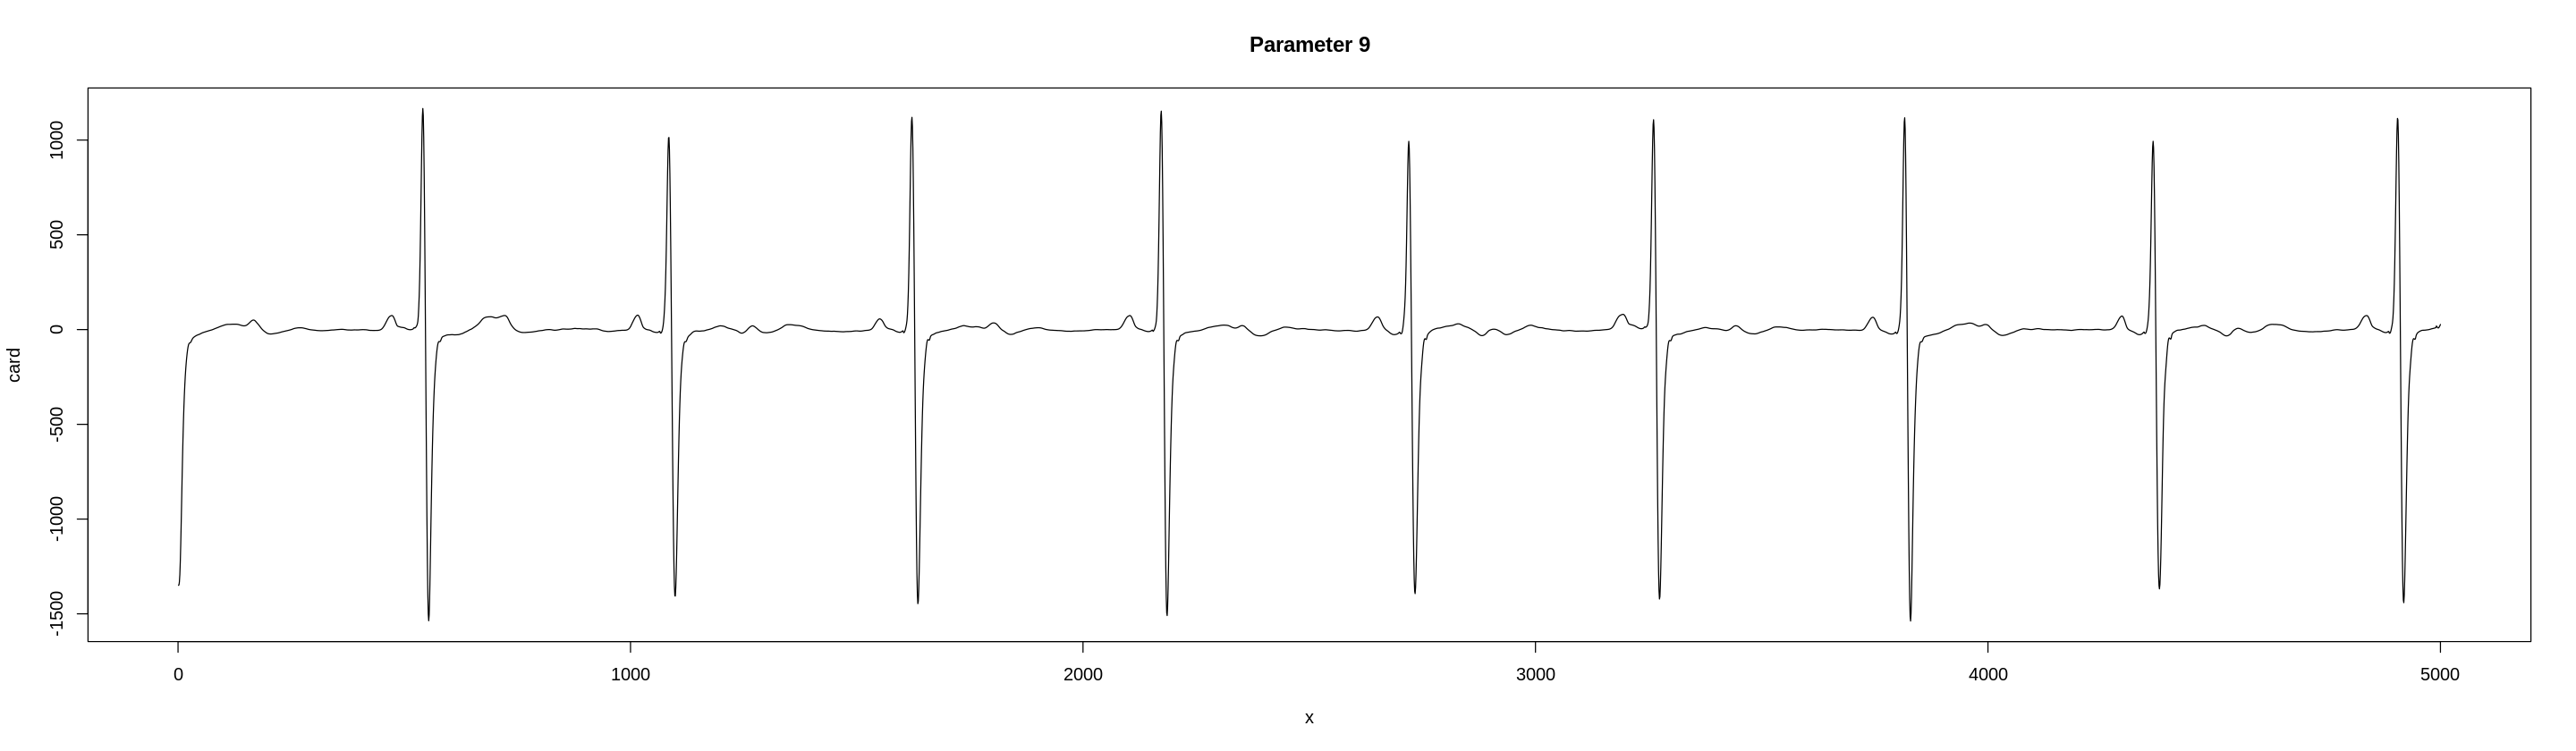

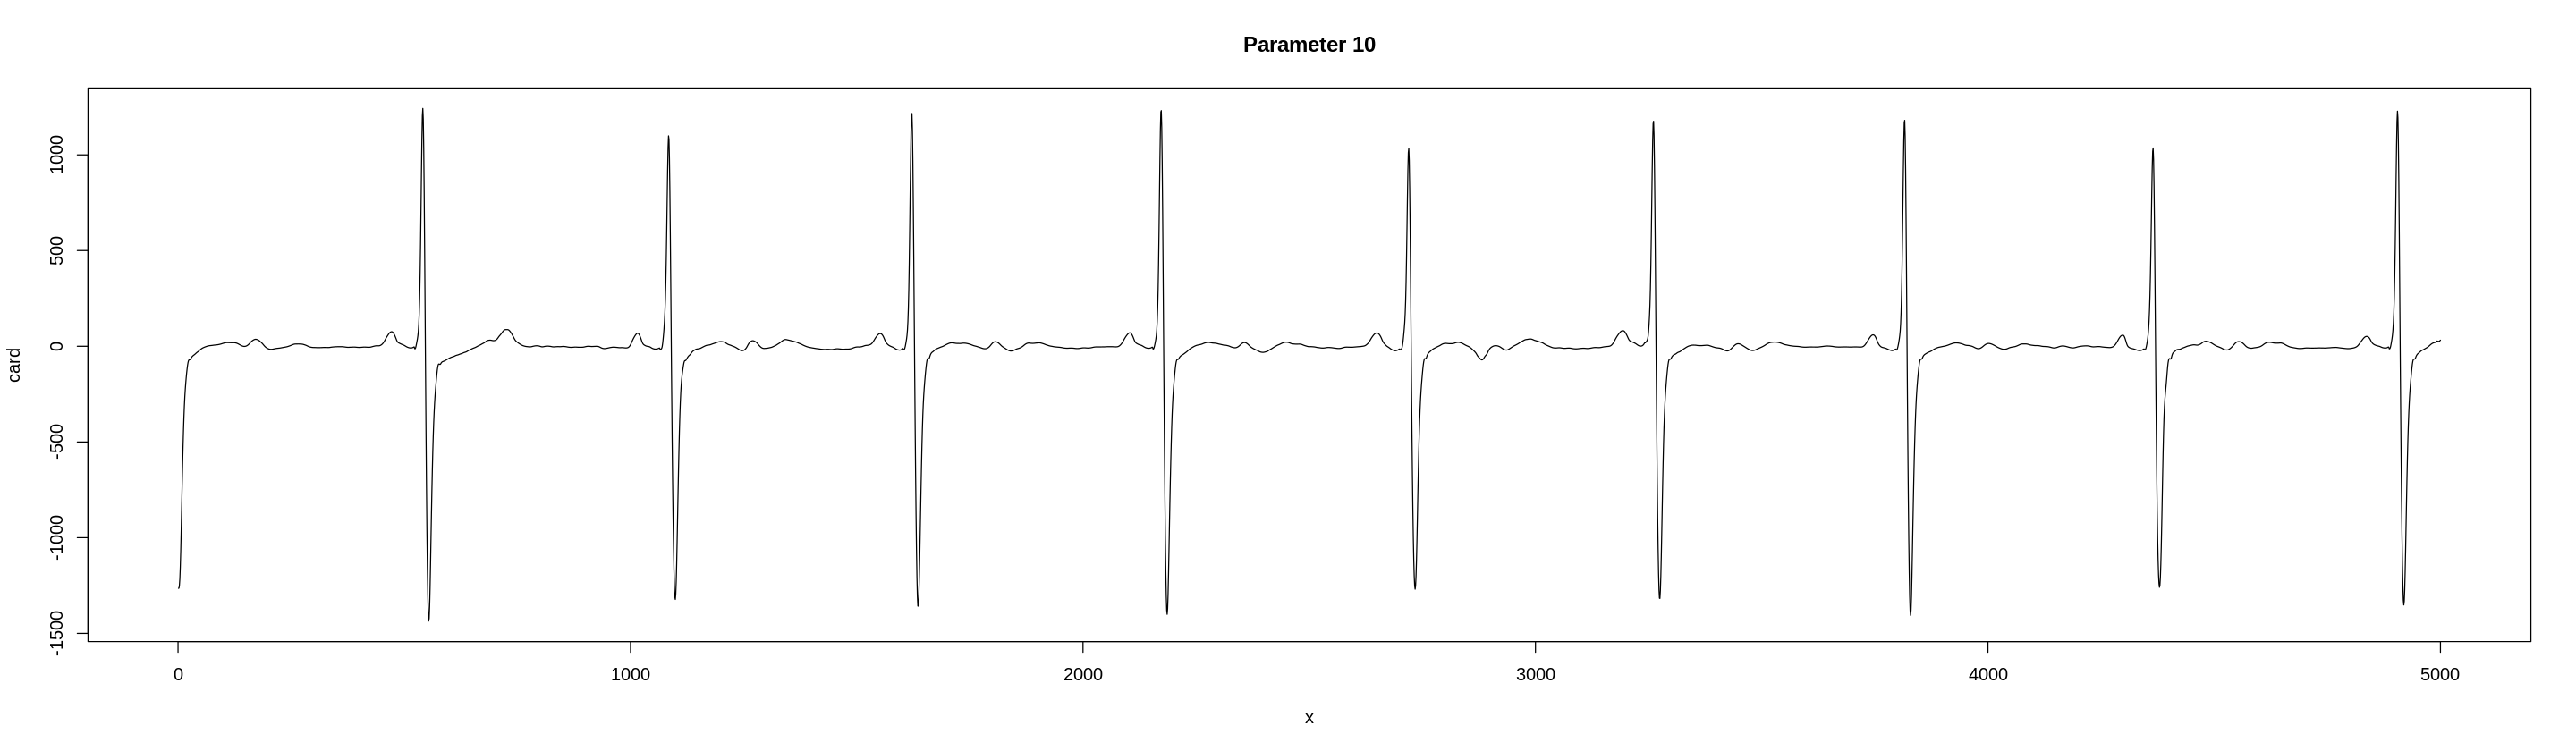

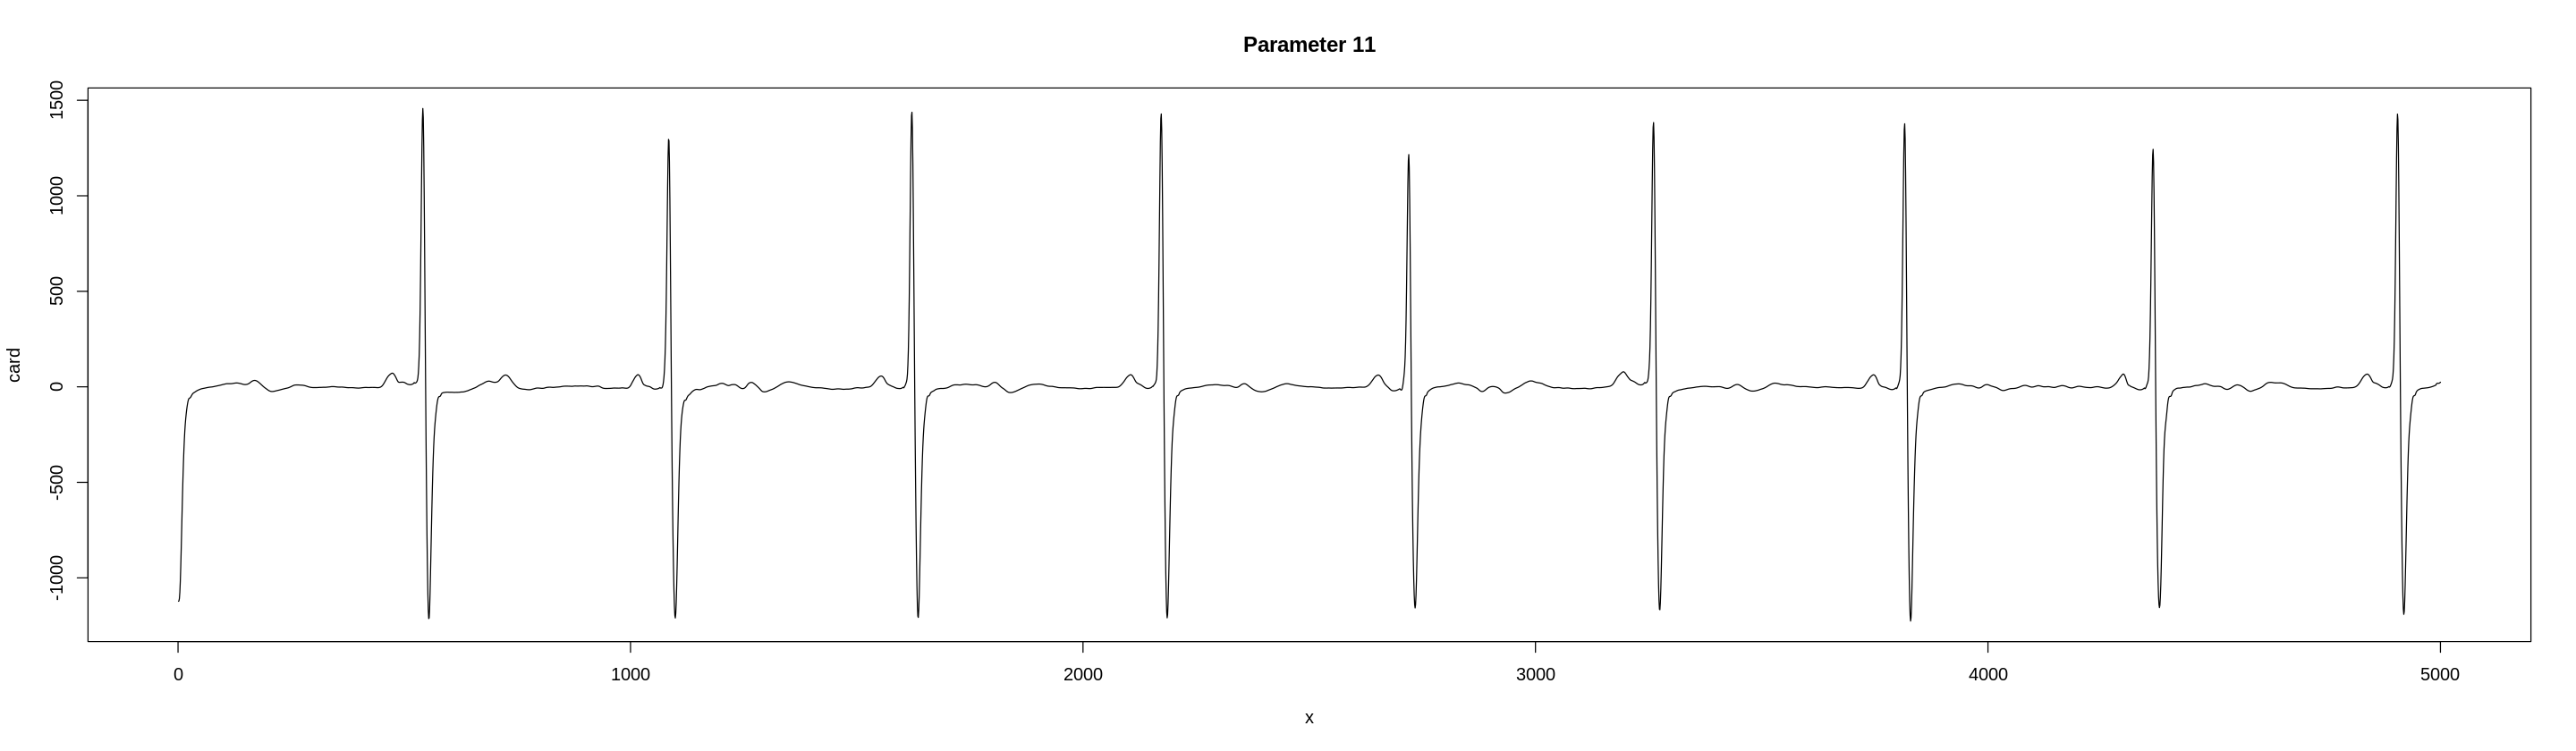

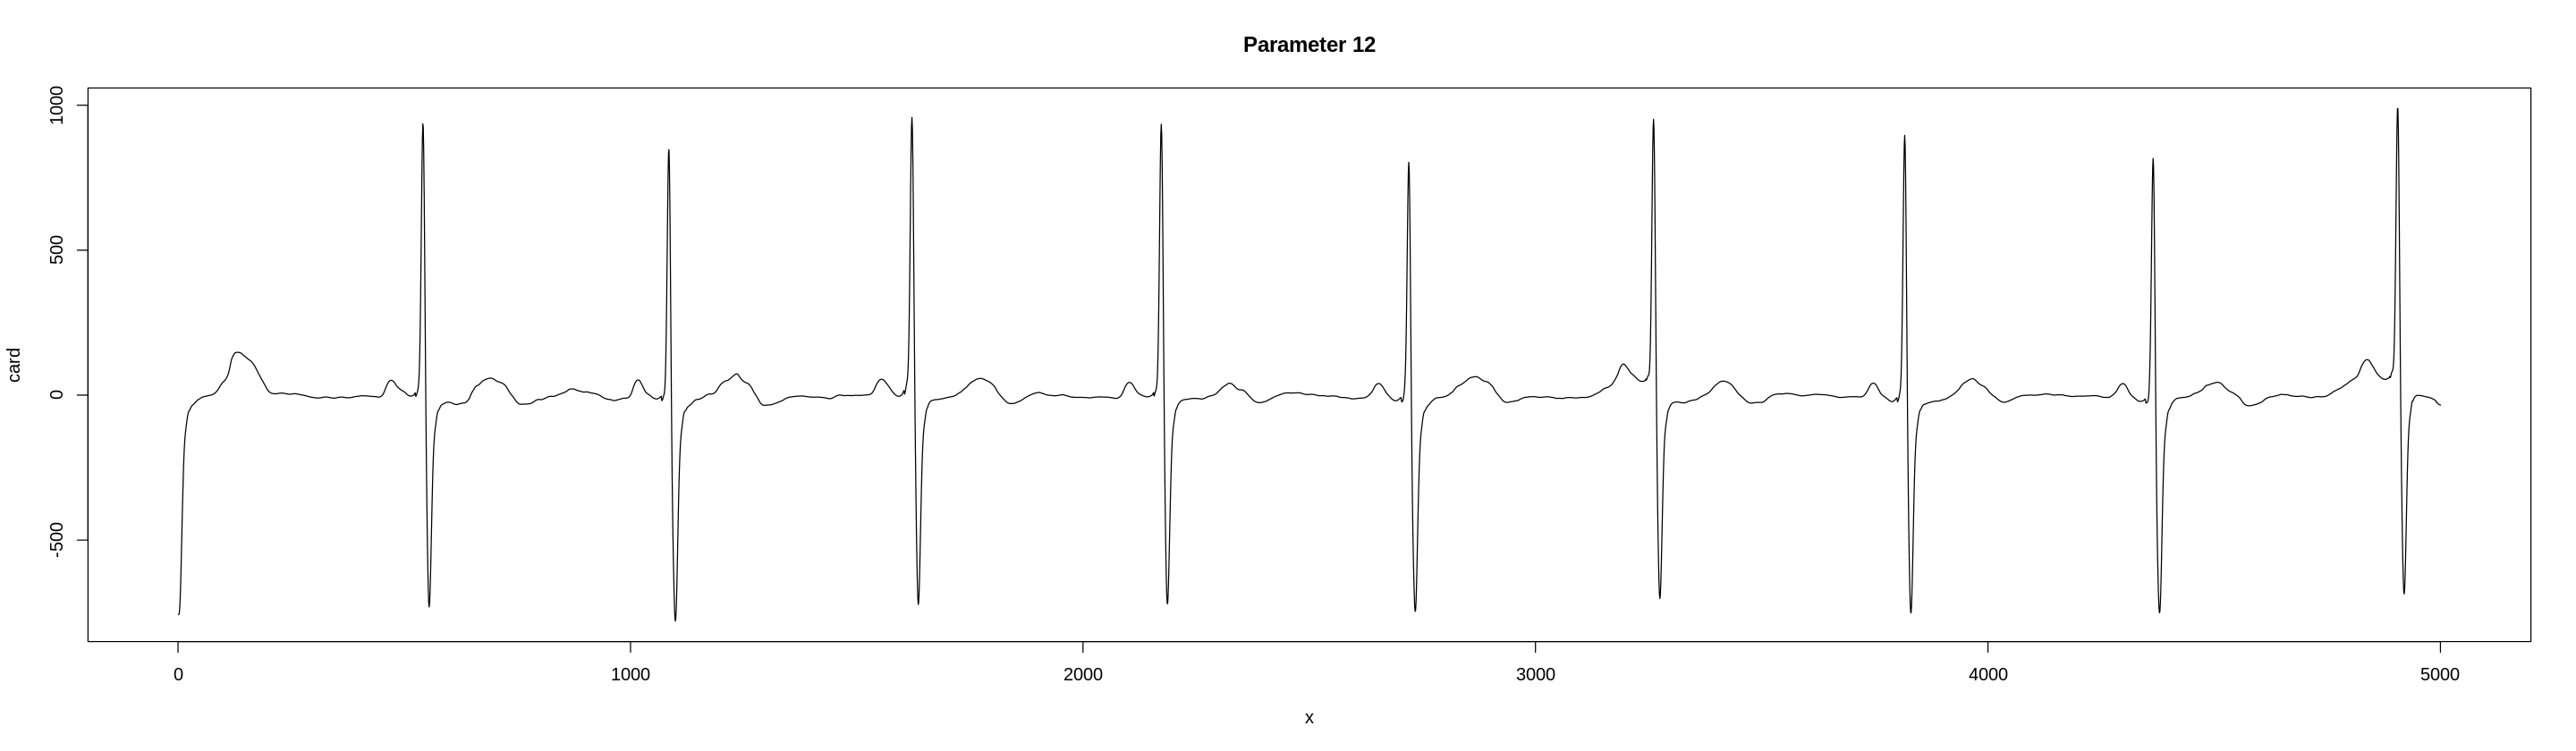

In [ ]:
url <- 'https://raw.githubusercontent.com/DNedilko/DAlabs/main/A9.txt'
cardio <- read.delim(url, header = FALSE)
cardio <- round(as.numeric(unlist(sapply(cardio, function(x) strsplit(x,',')))),5)
cardio <-matrix(cardio, nrow=12)

options(repr.plot.width =24, repr.plot.hight = 1)
for (i in 1:12){
    card<- cardio[i,]                                       
    x <- c(1:length(card))
    plot(x ,card, type='l', main = paste('Parameter', i))
}



Тепер для заданих параметрів оцінимо основні статистичні параметри -
середнє, дисперсію, моду, медіану, коефіцієнт асиметрії, коефіцієнт ексцесу та перевіряємо гіпотезу. Виводимо графіки

          avg  variance    mode    median    asymetry    exces    H0
1   16.662613  6482.146 -10.339  0.007430  4.62505203 29.63504 FALSE
2   -3.325474  6351.889 -10.886 -0.263525 -4.22624315 26.98874 FALSE
3  -16.187409  9808.369  11.302  0.331725 -4.15945873 21.72919 FALSE
4   -7.364079  4093.360 -10.495  0.107165 -0.46107802 17.52370 FALSE
5   15.226038  6529.313 -16.252 -0.558745  4.59071204 27.16256 FALSE
6  -10.854005  6456.310 -16.951  0.080255 -4.50363903 25.33907 FALSE
7  -12.369346  7873.998 -61.596 -0.539025 -5.03358394 33.34600 FALSE
8  -23.327999 38316.761  40.342  0.254955 -5.08321222 32.72836 FALSE
9  -17.358815 51755.227  11.584 -1.235350 -2.44438283 24.57189 FALSE
10 -17.398306 49545.905 -10.258 -2.477300 -1.83172657 23.49266 FALSE
11  -8.610282 47245.842  11.388 -1.594150 -0.04377472 24.61003 FALSE
12   0.723487 19657.089  51.981 -2.467800  0.35785960 24.03620 FALSE


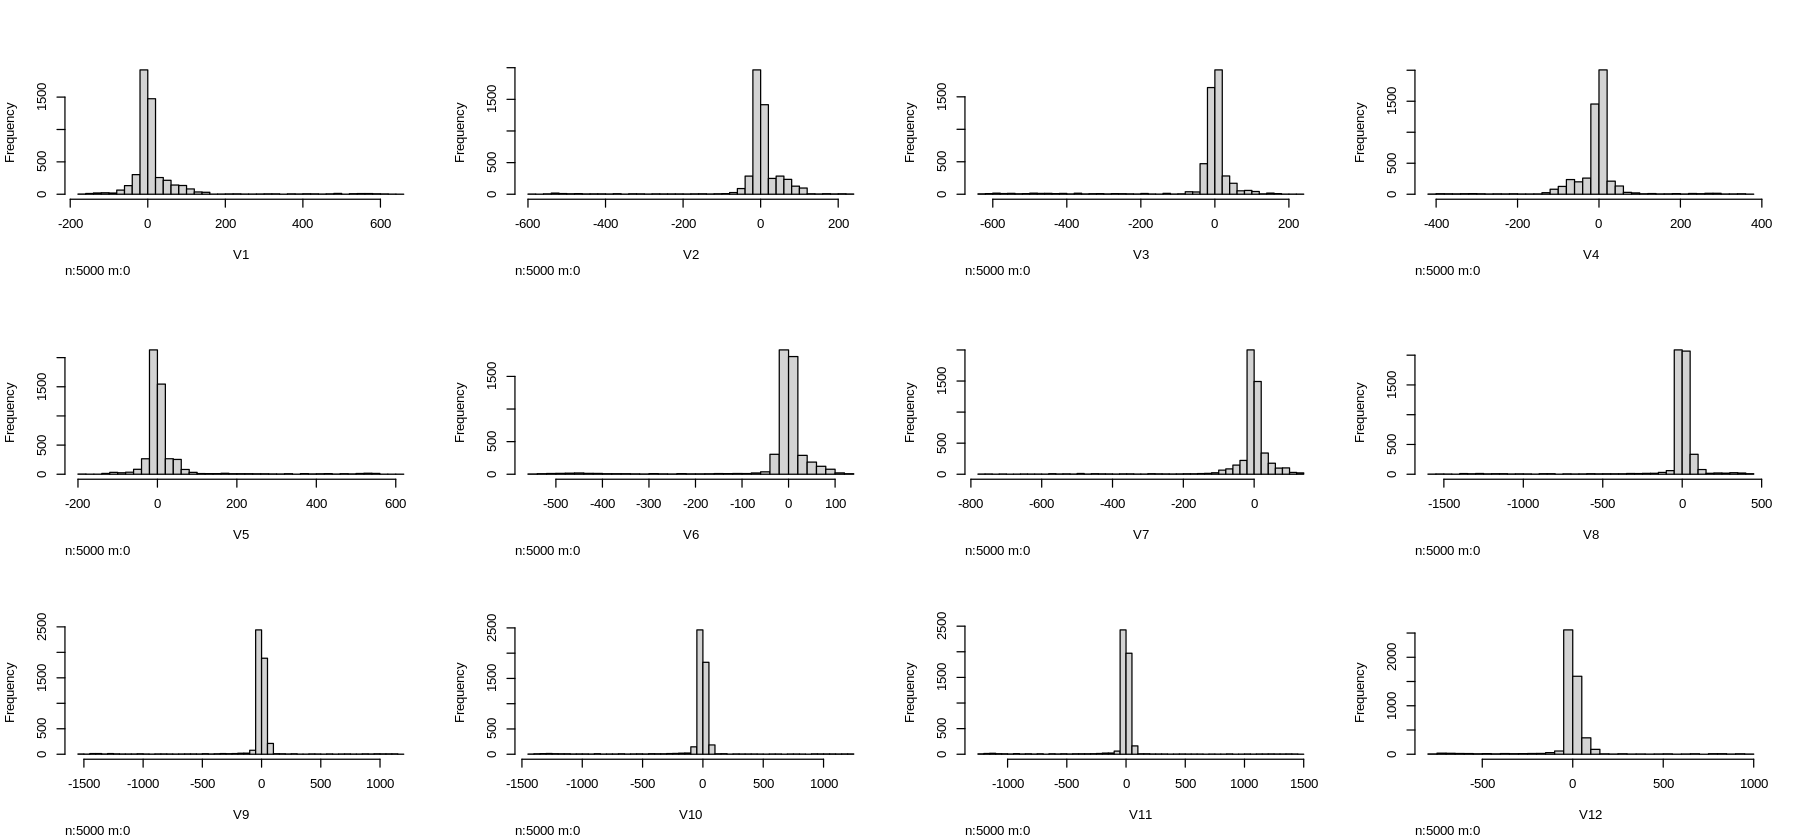

In [ ]:
mode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

variance <- function(v){
  m <- mean(v)
  mn <- v-m
  return(sum(mn^2)/(length(v)-1))
}

moment <- function(v,k){
  m <- mean(v)
  sig <- sqrt(var(v))
  vk <- v-m 
  fs <- vk^k
  return (sum(fs)/(length(v)*(sig^k)))

}

avg <- apply(cardio,1,mean)
# test <- print(round(apply(cardio,1,variance),3))
variance <- apply(cardio,1,var)
mode <- apply(cardio,1,mode)
median <- apply(cardio,1,median)
# asym_point_test <-  print(apply(cardio,1,function(n) sqrt(6/(length(n)+3))))
asymetry <- apply(cardio,1,function(v) moment(v,3))
# exc_point_test <-  print(asym_point_test*2)
exces <- apply(cardio,1,function(v) moment(v,4))
H0 <- sapply(1:12,function(n) toString(0.01<shapiro.test(cardio[n,])[2]))

df <- data.frame( avg,variance,mode,median, asymetry, exces, H0)
print(df)

options(repr.plot.width =15)
data <- as.data.frame(t(cardio))
hist.data.frame(data)

# Однофакторний аналіз

Для початку, скористаємося G-критерієм Кокрена для перевірки рівності дисперсій. Для цього скористуємося формулами:


$S_{i}^{2}=\cfrac{\sum_{j=1}^{n} (x_{ij}-\bar{x_i})}{n-1} $


$g = \cfrac{max S_i^2}{\sum_{i=1}^{k}S_i^2}$

In [ ]:
# тут має бути якась функція

Sfunc <- function(params){
  mean_vals <- apply(params,1, mean)
  n <- length(params[1,])
  factors <- sapply(1:length(mean_vals),
    function(i) sum(sapply(params[i], function(xj) (xj- mean_vals[i])^2))/(n-1))
  return(factors)
}

g <- function(S){
  g <- max(S)/sum(S)
  return(g)
}

для пошуку g критичного скористаємося таблицею, де ступінь вільності f1 = n-1=4999 , f2 = 12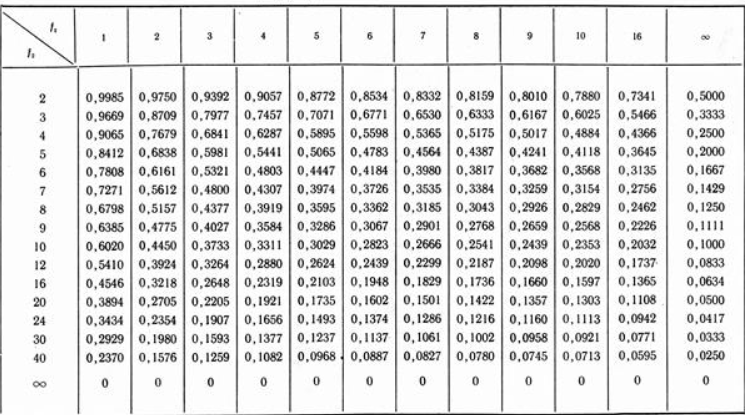

In [ ]:
ge <- g(Sfunc(cardio))
g_cr <- 0.0833


cat("Критичне значення g = ", g_cr,", експериментальне ",ge)
if (ge > g_cr){
  cat('\nГіпотеза відхилена.' )
}

Критичне значення g =  0.0833 , експериментальне  0.2208902
Гіпотеза відхилена.

Оскільки гіпотеза відхилена, скористаємося тестом Краскела-Уоліса. Формули для розрахунків:




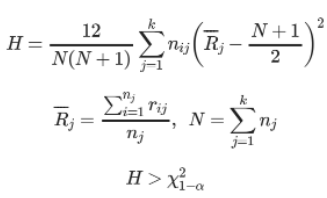



Значення параметру $ \chi ^2 $ візьмемо з таблиці $\alpha = 0.95$, 11 ступенів свободи. [Подивитися тут](https://uk.wikipedia.org/wiki/%D0%9A%D1%80%D0%B8%D1%82%D0%B5%D1%80%D1%96%D0%B9_%D1%83%D0%B7%D0%B3%D0%BE%D0%B4%D0%B6%D0%B5%D0%BD%D0%BE%D1%81%D1%82%D1%96_%D0%9F%D1%96%D1%80%D1%81%D0%BE%D0%BD%D0%B0)

In [ ]:
H <- kruskal.test(as.list(as.data.frame(t(cardio))))[1]
chi_2 <- qchisq(0.05, 11, lower.tail = FALSE)

if (H>chi_2){
  cat("Гіпотеза Н0 відхилена. Фактори мають значущий вплив.")
}else{
  cat("Гіпотезу не відхиляємо")
}

Гіпотеза Н0 відхилена. Фактори мають значущий вплив.

# Двохфакторний аналіз

Матриця двохфакторного експерименту


In [ ]:
Bf <- apply(cardio,1,function(i) sapply(seq(1,4001,by = 1000),function(j) mean(i[j:(j+999)])))

# ranked_a <- t(apply(Bf,1, rank))
# ranked_b <- t(apply(Bf,2, rank))



Для початку необхідно поріхувати основні показники $Q_{1-4}$ за формулами 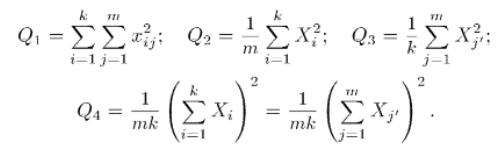

In [ ]:
m <- length(Bf)
k <- length(Bf[1,])

Q1 <- sum(apply(Bf, c(1,2), function(x) x^2))
Q2 <- sum(apply(Bf,2,function(x) sum(x)^2))/m
Q3 <- sum(apply(Bf,1,function(x) sum(x)^2))/k
Q4 <- sum(apply(Bf,2, sum))^2/(k*m)

Знаходимо оцінки дисперсій та перевіряємо значущість факторів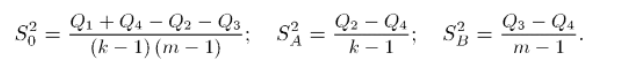

In [ ]:
f1A <- k-1
f1B <- m-1
f2 <- (k-1)*(m-1)
fishA <- qf(0.95, f1A, f2, lower.tail=TRUE)
fishB <- qf(0.95, f1B, f2, lower.tail=TRUE)

Ssqo <- (Q1+Q4-Q2-Q3)/f2
SsqA <- (Q2-Q4)/f1A
SsqB <- (Q3-Q4)/f1B

if (SsqA/Ssqo > fishA){
  cat('Фактор А є значущим\n')
  depA = 1
}else{
  cat('Фактор А не є значущим\n')
  depA=0
}

if (SsqB/Ssqo > fishB){
  cat('Фактор B є значущим\n')
  depB = 1
}else{
  cat('Фактор B не є значущим\n')
  depb = 0
}

if(depA==depB){
  cat('Оскільки Фактори є залежними, \nрозрахуємо додатково Q5 та перевіримо \nвзаємодію факторів')
  Q5 =sum(apply(cardio,c(1,2), function(x) x^2))
  SsqAB = (Q5-Q1)/(m*k*999)

  f1 <- f2
  f2 <- m*k*999
  fish <- qf(0.95, f1, f2, lower.tail=TRUE)
  if(1000*Ssqo/SsqAB>fish){
    cat('\nФактори взаємодіють')
  }  
}

Фактор А є значущим
Фактор B є значущим
Оскільки Фактори є залежними, 
розрахуємо додатково Q5 та перевіримо 
взаємодію факторів
Фактори взаємодіють

#Висновки
Згідно однофакторного та двофакторного аналізу ми отримали, що вплив фактору є значним. Обидва тести дали нам однаковий результат - фактори мають значний вплив та вони взаємодіють між собою. Результати експерименту приймаємо.